##### As the popularity of vegetarianism continues to grow, it is natural to question the effect on the avocado market. Specifically, one might wonder if the cost of avocados has increased over time, and if this has had any impact on sales. This includes considering the overall volume of sales, as well as sales for the three different PLU codes that are available. Understanding the changes in price and its impact on the market can provide valuable insights into the trends and developments in the industry.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"avocado_cleaned.csv")

In [3]:
df.head()

Date  AveragePrice  TotalVolume  plu4046   plu4225  plu4770  \
0   1/4/2015          1.22     40873.28  2819.50  28287.42    49.90   
1   1/4/2015          1.79      1373.95    57.42    153.88     0.00   
2  1/11/2015          1.24     41195.08  1002.85  31640.34   127.12   
3  1/11/2015          1.77      1182.56    39.00    305.12     0.00   
4  1/18/2015          1.17     44511.28   914.14  31540.32   135.77   

   TotalBags  SmallBags  LargeBags  XLargeBags          type  year  region  
0    9716.46    9186.93     529.53         0.0  conventional  2015  Albany  
1    1162.65    1162.65       0.00         0.0       organic  2015  Albany  
2    8424.77    8036.04     388.73         0.0  conventional  2015  Albany  
3     838.44     838.44       0.00         0.0       organic  2015  Albany  
4   11921.05   11651.09     269.96         0.0  conventional  2015  Albany

In [4]:
df['Date']= pd.to_datetime(df['Date'])

### Average Price of avocados by year

In [5]:
df[['year', 'AveragePrice']].groupby('year').mean()#.to_csv("table1.csv", index=True)

AveragePrice
year              
2015      1.375590
2016      1.338640
2017      1.515128
2018      1.436522
2019      1.523414
2020      1.392599
2021      1.374634

### Comparison of different avocado varieties with the volume sold

In [6]:
tempdf = df[~df['region'].isin(['TotalUS', 'West', 'California', 'SouthCentral', 'Northeast', 'Southeast', 'GreatLakes', 'Midsouth', 'Plains'])]
tempdf[['year', 'TotalVolume', 'plu4046', 'plu4225', 'plu4770']].groupby('year').sum().round(1)#.to_csv("table2.csv", index=True)

TotalVolume      plu4046      plu4225     plu4770
year                                                    
2015  1.070958e+09  405634285.2  438677062.8  35553569.5
2016  1.182572e+09  347229526.4  421453069.4  39025804.2
2017  1.204919e+09  379283791.6  390665808.8  24005389.2
2018  1.252925e+09  416497484.6  353404109.3  25490317.5
2019  1.266247e+09  355048304.9  324802217.8  27913329.0
2020  1.541126e+09  410510758.0  300021823.6  22064397.7
2021  1.379768e+09  331912769.3  242667450.5  16369216.1

In [7]:
tempdf = df[~df['region'].isin(['TotalUS', 'West', 'California', 'SouthCentral', 'Northeast', 'Southeast', 'GreatLakes', 'Midsouth', 'Plains'])]
tempdf[['year', 'plu4046', 'plu4225', 'plu4770']].groupby('year').sum().round(1)#.to_csv("table3.csv", index=True)

plu4046      plu4225     plu4770
year                                      
2015  405634285.2  438677062.8  35553569.5
2016  347229526.4  421453069.4  39025804.2
2017  379283791.6  390665808.8  24005389.2
2018  416497484.6  353404109.3  25490317.5
2019  355048304.9  324802217.8  27913329.0
2020  410510758.0  300021823.6  22064397.7
2021  331912769.3  242667450.5  16369216.1

### Total Sales Volume by region

In [8]:
tempdf = df[df['region'].isin(['West', 'California', 'SouthCentral', 'Northeast', 'Southeast', 'GreatLakes', 'Midsouth', 'Plains'])]
tempdf[['region', 'TotalVolume']].groupby('region').sum().round(0).sort_values(by=['TotalVolume'], ascending=False)#.to_csv("table4.csv", index=True)

TotalVolume
region                    
West          2.386839e+09
California    2.193436e+09
SouthCentral  2.161541e+09
Northeast     1.728009e+09
Southeast     1.562577e+09
GreatLakes    1.328850e+09
Midsouth      1.232041e+09
Plains        6.862798e+08

### Top 10 regions with the most sales

In [9]:
tempdf = df[~df['region'].isin(['TotalUS', 'West', 'California', 'SouthCentral', 'Northeast', 'Southeast', 'GreatLakes', 'Midsouth', 'Plains'])]
tempdf[['region', 'TotalVolume']].groupby('region').sum().sort_values(by=['TotalVolume'], ascending=False).round(0).head(10)#.to_csv("table5.csv", index=True)

TotalVolume
region                           
LosAngeles           1.058984e+09
NewYork              5.929365e+08
DallasFtWorth        4.950626e+08
PhoenixTucson        4.385011e+08
Houston              4.266760e+08
Denver               3.239357e+08
BaltimoreWashington  3.126665e+08
WestTexNewMexico     3.120974e+08
SanFrancisco         3.061415e+08
Chicago              2.927174e+08

### Comparison of different varieties in the LosAngeles region

In [10]:
tempdf = df[df['region'] == 'LosAngeles']
tempdf[['year', 'TotalVolume', 'plu4046', 'plu4225', 'plu4770']].groupby('year').sum().round(0).head(10)#.to_csv("table6.csv", index=True)

TotalVolume     plu4046     plu4225    plu4770
year                                                
2015  148220693.0  90357986.0  32732333.0  3832864.0
2016  163142303.0  55735010.0  35609084.0  4200598.0
2017  158481174.0  62259490.0  27523901.0  4629497.0
2018  134840118.0  51232419.0  21484160.0  3794002.0
2019  142374401.0  43483228.0  16737046.0  5319983.0
2020  162869844.0  49457754.0   3861913.0  6802461.0
2021  149055186.0  29203132.0   2585999.0  4994675.0

### Relationship between average price and total volume

In [11]:
temp_df = df[['TotalVolume', 'AveragePrice', 'year']].groupby('year').agg(Mean=('AveragePrice', np.mean), Sum=('TotalVolume', np.sum))
temp_df.rename(columns={'Mean': 'AvgPrice', 'Sum': 'TotalVol'})#.to_csv("table7.csv", index=True)


AvgPrice      TotalVol
year                        
2015  1.375590  4.385469e+09
2016  1.338640  4.820890e+09
2017  1.515128  4.934306e+09
2018  1.436522  4.939448e+09
2019  1.523414  4.977871e+09
2020  1.392599  6.019683e+09
2021  1.374634  5.379995e+09

### Regions with the most quantity sold

In [12]:
for i in [2015, 2016, 2017, 2018, 2019, 2020, 2021]:    
    filt1 = ~df['region'].isin(['TotalUS', 'West', 'California', 'SouthCentral', 'Northeast', 'Southeast', 'GreatLakes', 'Midsouth', 'Plains'])
    filt2 = df['year'] == i
    
    tempdf = df[filt1 & filt2]
    result = tempdf[['region', 'TotalVolume']].groupby('region').max().round(1).sort_values(by=['TotalVolume'], ascending=False).head(10)
    #.to_csv(f"table{i}.csv", index=True)
    print(f"Year {i}")
    print(result)
    print("---------------------------------------")

Year 2015
                     TotalVolume
region                          
LosAngeles             4031949.0
NewYork                2180520.2
PhoenixTucson          1544750.9
Houston                1533409.3
DallasFtWorth          1508750.4
SanFrancisco           1352027.6
Chicago                1133491.7
WestTexNewMexico       1053998.0
BaltimoreWashington    1007418.8
Denver                  990211.6
---------------------------------------
Year 2016
                  TotalVolume
region                       
LosAngeles          4982700.1
NewYork             2740587.9
PhoenixTucson       1609195.4
DallasFtWorth       1515264.3
Houston             1406283.8
Denver              1365558.3
SanFrancisco        1355047.2
WestTexNewMexico    1198679.9
Miami               1180631.1
Chicago             1134049.2
---------------------------------------
Year 2017
                  TotalVolume
region                       
LosAngeles          5470227.1
NewYork             2544483.1
PhoenixTucson 

### Regions with the least quantity sold

In [13]:
for i in [2015, 2016, 2017, 2018, 2019, 2020, 2021]:    
    filt1 = ~df['region'].isin(['TotalUS', 'West', 'California', 'SouthCentral', 'Northeast', 'Southeast', 'GreatLakes', 'Midsouth', 'Plains'])
    filt2 = df['year'] == i
    
    tempdf = df[filt1 & filt2]
    result = tempdf[['region', 'TotalVolume']].groupby('region').max().round(1).sort_values(by=['TotalVolume'], ascending=True).head(10)
    #.to_csv(f"table{i}.csv", index=True)
    print(f"Year {i}")
    print(result)
    print("---------------------------------------")

Year 2015
                  TotalVolume
region                       
Syracuse              78708.4
Boise                113578.2
Albany               124055.3
Louisville           125505.0
Spokane              135656.4
Roanoke              168217.7
BuffaloRochester     170547.2
Pittsburgh           208821.0
Columbus             216653.1
Nashville            222813.0
---------------------------------------
Year 2016
                  TotalVolume
region                       
Syracuse              90935.2
Boise                136377.6
Louisville           148704.3
Spokane              154732.5
Pittsburgh           169483.3
Albany               173781.8
Roanoke              198011.3
BuffaloRochester     201142.6
Indianapolis         240237.3
Columbus             242277.4
---------------------------------------
Year 2017
                  TotalVolume
region                       
Syracuse             104027.1
Louisville           135486.5
Boise                136090.7
Spokane             

### Relationship between average price and total volume in the LosAngeles region.

In [14]:
tempdf = df[df['region'] == "LosAngeles"]
tempdf[['year', 'AveragePrice', 'TotalVolume']].groupby('year').agg(Mean=('AveragePrice', np.mean), Sum=('TotalVolume', np.sum)).rename(columns={'Mean': 'AvgPrice', 'Sum': 'TotalVol'})#.to_csv(f"table22.csv", index=True)

AvgPrice      TotalVol
year                        
2015  1.152500  1.482207e+08
2016  1.083750  1.631423e+08
2017  1.377358  1.584812e+08
2018  1.475334  1.348401e+08
2019  1.546266  1.423744e+08
2020  1.528984  1.628698e+08
2021  1.498328  1.490552e+08


### The heatmap below suggests that Los Angeles and New York play a significant role in the avocado market, with high sales figures.

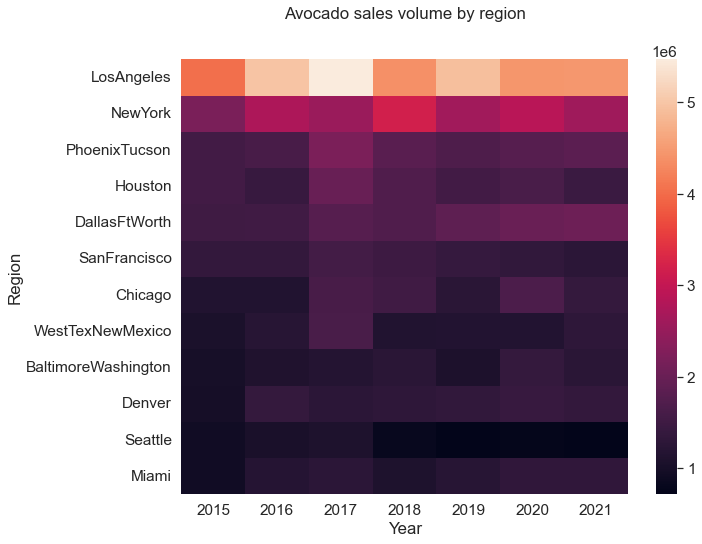

In [18]:
tempdf = df[~df['region'].isin(['TotalUS', 'West', 'California', 'SouthCentral', 'Northeast', 'Southeast', 'GreatLakes', 'Midsouth', 'Plains'])]

df_group = tempdf[['region', 'year', 'TotalVolume']].groupby(['region', 'year']).max().reset_index()
df_pivot = df_group.pivot(index='region', columns='year', values='TotalVolume').reset_index().sort_values(by=[2015], ascending=False).head(12).reset_index(drop=True).set_index('region')


gfg = sns.heatmap(df_pivot)
gfg.set(xlabel ="Year", ylabel = "Region", title ='Avocado sales volume by region\n\n')
sns.set(font_scale=1.4)
plt.rcParams["figure.figsize"] = (10,8)

plt.show()

### .....

In [17]:
tempdf = df[df['region'] == "LosAngeles"][['year', 'AveragePrice', 'TotalVolume']].groupby('year').agg({'TotalVolume':['mean'], 'AveragePrice':['mean']})
tempdf.columns = [''] * len(tempdf.columns)
tempdf = tempdf.round(2)
tempdf.columns = ['Avg_volume', 'Avg_price']


tempdf['population'] = [3943215, 3969262, 3982002, 3990456, 3979576, 3898747, 3909274]
tempdf['avocadoes_consumption'] = tempdf['Avg_volume'] / tempdf['population']
tempdf['price_per_avocado '] = tempdf['avocadoes_consumption'] * tempdf['Avg_price']

tempdf#.to_csv("table24.csv", index=True)

Avg_volume  Avg_price  population  avocadoes_consumption  \
year                                                             
2015  1425198.97       1.15     3943215               0.361431   
2016  1568675.99       1.08     3969262               0.395206   
2017  1495105.42       1.38     3982002               0.375466   
2018  1296539.60       1.48     3990456               0.324910   
2019  1368984.63       1.55     3979576               0.344003   
2020  1566056.19       1.53     3898747               0.401682   
2021  1552658.19       1.50     3909274               0.397173   

      price_per_avocado   
year                      
2015            0.415645  
2016            0.426822  
2017            0.518143  
2018            0.480867  
2019            0.533204  
2020            0.614573  
2021            0.595760